# Generatore Monte Carlo di raggi cosmici

La distribuzione angolare dei raggi cosmici che raggiungono il suolo terresrre segue approssimativamente la legge $\mathrm{d}P(\theta,\phi)/\mathrm{d}\Omega = k \cos^2\theta$ con $0\leq\theta<\pi/2$.

Il punto di impatto al suolo è uniformemente distribuito sulla superficie.

* Scrivere un generatore di raggi cosmici distribuiti secondo questo modello.
* Graficarne la distribuzione del punto di impatto e della direzione di provenienza.
* Graficare un numero finito con l'utility di matplotlib [quiver](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html), che è pensata per visualizzare un campo vettoriale, ma noi la useremo in modo diverso

Opzionale:

* Definire la geometria di un semplice telescopio, ad es.: fatto da due piani quadrati orizzontali posti ad una certa altezza tra di loro
* Calcolare le intersezioni con i due piani di rivelatore dei raggi cosmici generati aventi punto di impatto sul piano di base
* Calcolare l'accettanza geometrica del telescopio rispetto ai raggi cosmici che arrivano al rivelatore di base

## Distribuzione angolare

La prima cosa da fere è generare punti in due dimensioni, $(\theta, \phi)$, tali che i punti siani distribuiti secondo la legge:

$\displaystyle \frac{\mathrm{d}P}{\mathrm{d}\Omega} = \frac{\mathrm{d}P}{\sin\theta\mathrm{d}\theta\,\mathrm{d}\phi} = k \cos^2\theta$ 

dove $k$ è una costante di normalizzazione e $0\le \theta <\pi/2$
Possiamo anche riscrivere:

$\displaystyle\frac{\mathrm{d}P}{\mathrm{d}\theta\,\mathrm{d}\phi}=f(\theta)\,g(\phi)= k\sin\theta\cos^2\theta$ 

Dove:

$f(\theta)=c_1\sin \theta\cos^2\theta$

$g(\phi) = c_2$

e $k=c_1 c_2$.

La distribuzione cumulativa di $f(\theta)$ è:

$\displaystyle F(\theta) = c_1 \int_{0}^\theta \sin \theta^\prime\cos^2\theta^\prime\,\mathrm{d}\theta^\prime = 
-\frac{c_1}{3}\left[\cos^3\theta^\prime\right]_{\theta^\prime=0}^{\theta^\prime=\theta} = 
\frac{c_1}{3}(1 - \cos^3\theta)$

Il coefficiente di normalizzazionre $c_1$ va posto in modo che sia $F(\pi/2) = 1$:

$\displaystyle 1 = \frac{c_1}{3}\left(1 - \cos^3 \frac{\pi}{2}\right) = \frac{c_1}{3}$

Quindi $c_1 = 3$ e $F(\theta) = 1 - \cos^3\theta$.

$F(\theta)$ va invertita per otterenere $\theta$ dall'equazione: $F(\theta)= r_1$, dove $r_1$ è un numero uniormemente distribuito in $[0,1\,[$:


$\displaystyle 1 - \cos^3\theta = r_1$

Da cui:


$\displaystyle\theta = \mathrm{arccos}(\sqrt[3]{1-r_1})\in \left[0, \frac{\pi}{2}\right[$

Considerando che la distribuzione di $1-r_1$ è la stessa di $r_1$, potremmo anche scrivere:

$\displaystyle\theta = \mathrm{arccos}(\sqrt[3]{r_1})\in \left] 0, \frac{\pi}{2}\right]$

Ma escluderemmo il valore $\theta=0$, che altrimenti avrebbe probabilità molto piccola, ma non nulla, di essere estratto, considerando che i valori estratti sono discretizzati in base alla precisione numerica della macchina.

L'angolo $\phi$, come di consueto, si può generare unifrmemente tra $0$ e $2\pi$ a partire da un numero $r_2$ distribuito uniformemente in $[0,1\,[$:
$\phi = 2\pi r_2\in [0, 2\pi\,[$

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [14]:
n = 5000000
th, ph = np.arccos((1 - np.random.uniform(size=n))**(1/3)), 2*math.pi*np.random.uniform(size=n)
st, ct = np.sin(th), np.cos(th)
sp, cp = np.sin(ph), np.cos(ph)
us, vs, ws = st*cp, st*sp, ct

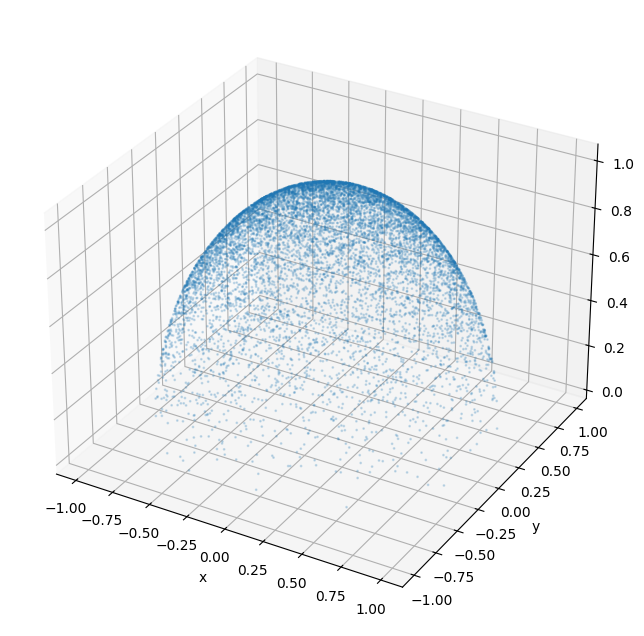

In [17]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
nmax = 10000
ax.scatter(us[:nmax], vs[:nmax], ws[:nmax], marker='o', s=1, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.show()

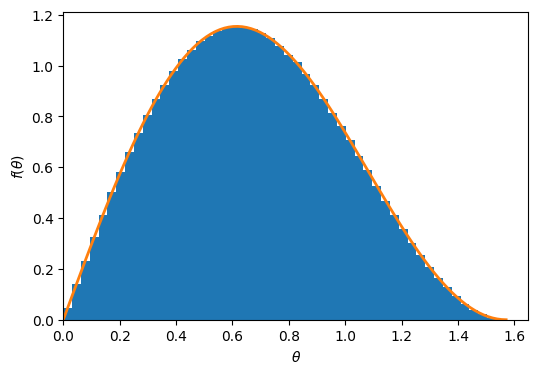

In [18]:
plt.figure(figsize = (6, 4))
plt.hist(th, density=True, bins = 50)
xpts = np.linspace(0, math.pi/2, 100)
ypts = 3*np.sin(xpts)*np.cos(xpts)**2
plt.plot(xpts, ypts, linewidth=2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.xlim(0)
plt.show()

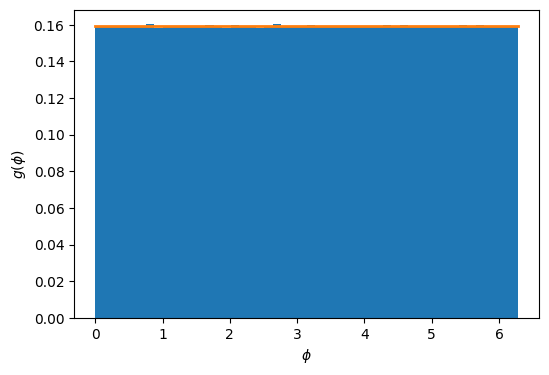

In [19]:
plt.figure(figsize=(6, 4))
plt.hist(ph, density=True, bins=50)
xpts = np.linspace(0, 2*math.pi, 100)
ypts = [0.5/math.pi]*len(xpts)
plt.plot(xpts, ypts, linewidth=2)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$g(\phi)$')
plt.show()

## Distribuzione dei punti di impatto

I punti di impatto vanno semplicemente generati uniformemente nella superficie che si vuole considerare. Tipicamente, questa è determinata dalla geometria del rivelatore di interesse.

Consideriamo un piano di $1\mathrm{m}\times 1\mathrm{m}$.

In [22]:
x0s = np.random.uniform(size=n) - 0.5
y0s = np.random.uniform(size=n) - 0.5
z0s = np.zeros(n)

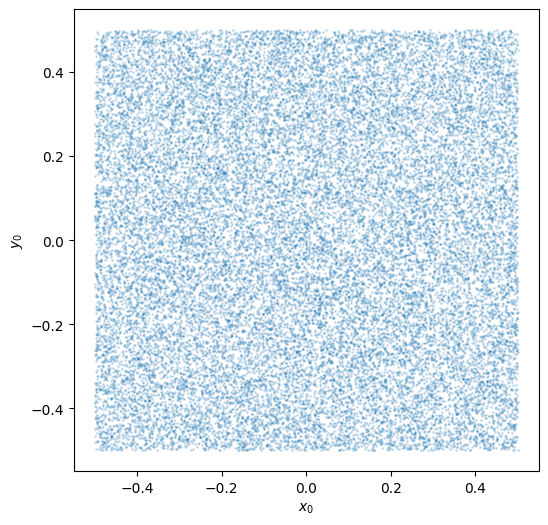

In [33]:
plt.figure(figsize=(6, 6))
nmax = 30000
plt.scatter(x0s[:nmax], y0s[:nmax], s=1, alpha=0.2)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$y_0$')
plt.show()

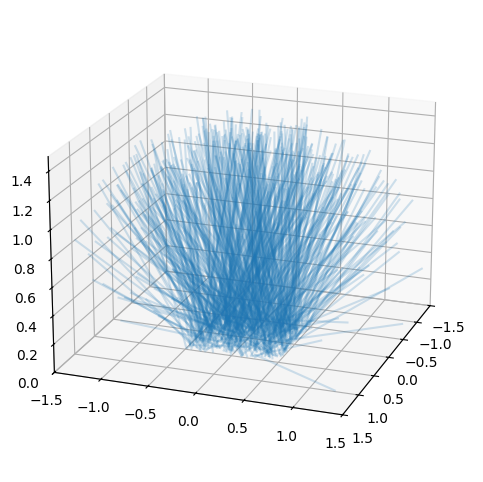

In [42]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
nmax = 500
ax.quiver(x0s[:nmax], y0s[:nmax], z0s[:nmax], us[:nmax], vs[:nmax], ws[:nmax],
          arrow_length_ratio=0, length=1.5, alpha=0.2)
ax.set_xlim3d(-1.5, 1.5)
ax.set_ylim3d(-1.5, 1.5)
ax.set_zlim3d(0, 1.5)
plt.show()

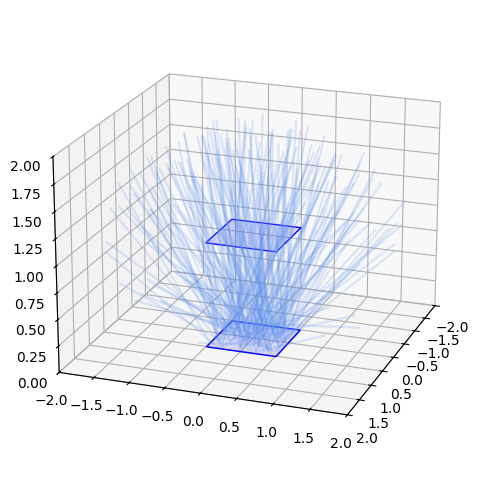

In [45]:
import mpl_toolkits.mplot3d as a3
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
nmax = 200
ax.quiver(x0s[:nmax], y0s[:nmax], z0s[:nmax], us[:nmax], vs[:nmax], ws[:nmax], length=2, arrow_length_ratio=0,
            color='cornflowerblue', alpha=0.2)
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(0,2)
plane_vtx = np.array([[-0.5, -0.5, 0], [0.5, -0.5, 0], [0.5, 0.5, 0], [-0.5, 0.5, 0]])
plane0 = a3.art3d.Poly3DCollection([plane_vtx], closed=True)
plane0.set_color('#0000ff20')
plane0.set_edgecolor('#0000ff')
ax.add_collection3d(plane0)
plane1 = a3.art3d.Poly3DCollection([plane_vtx + [0, 0, 1]], closed=True)
plane1.set_color('#0000ff20')
plane1.set_edgecolor('#0000ff')
ax.add_collection3d(plane1)
plt.show()